# Mini Project: Python Project

In [156]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [133]:
df1 = pd.read_excel(r'D:\Data Analytics Ables Jobs\PythonLiveClasses\Datasets\MiniProject-owid-covid-data.xlsx')
df1.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-03,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-04,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-05,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-01-06,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-01-07,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN


In [148]:
# made a copy of original data

df = df1.copy()

In [136]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 327243 entries, 0 to 327242
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   iso_code                                    327243 non-null  object 
 1   continent                                   311694 non-null  object 
 2   location                                    327243 non-null  object 
 3   date                                        327243 non-null  object 
 4   total_cases                                 289884 non-null  float64
 5   new_cases                                   318216 non-null  float64
 6   new_cases_smoothed                          316953 non-null  float64
 7   total_deaths                                268842 non-null  float64
 8   new_deaths                                  318271 non-null  float64
 9   new_deaths_smoothed                         317041 non-null  float64
 

In [159]:
# deleted unwanted columns

columnsToBeDeleted = [10,11,12,13,14,15,18,20,22,24,27,28,30,40,41,42,43,44,46,63,64,65,66]

df.drop(df.columns[columnsToBeDeleted], axis=1, inplace=True)

In [164]:
# after closly analysing the data I found it effective to fill zero/0 value in all the Null places, since null values would effect the analysis
df.fillna(0, inplace = True)

In [165]:
# no null values

df.isna().sum()

iso_code                          0
continent                         0
location                          0
date                              0
total_cases                       0
new_cases                         0
new_cases_smoothed                0
total_deaths                      0
new_deaths                        0
new_deaths_smoothed               0
reproduction_rate                 0
icu_patients                      0
hosp_patients                     0
weekly_icu_admissions             0
weekly_hosp_admissions            0
total_tests                       0
new_tests                         0
new_tests_smoothed                0
positive_rate                     0
tests_per_case                    0
tests_units                       0
total_vaccinations                0
people_vaccinated                 0
people_fully_vaccinated           0
total_boosters                    0
new_vaccinations                  0
new_vaccinations_smoothed         0
new_people_vaccinated_smooth

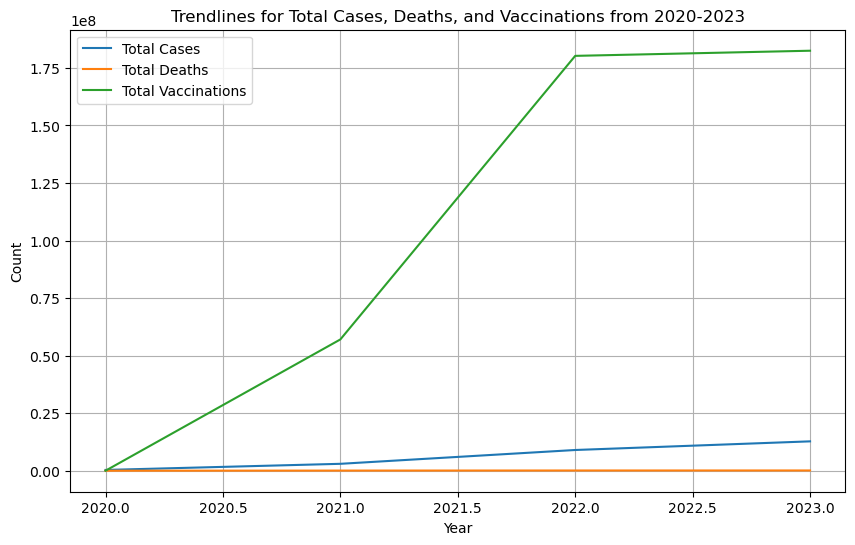

In [251]:
# Group by year and calculate the sum of total_cases, total_deaths, and total_vaccinations
grouped_df = df.groupby('year').agg({'total_cases': 'mean', 'total_deaths': 'mean', 'total_vaccinations': 'mean'}).reset_index()

# Plot the trendlines
plt.figure(figsize=(10, 6))
plt.plot(grouped_df['year'], grouped_df['total_cases'], label='Total Cases')
plt.plot(grouped_df['year'], grouped_df['total_deaths'], label='Total Deaths')
plt.plot(grouped_df['year'], grouped_df['total_vaccinations'], label='Total Vaccinations')
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Trendlines for Total Cases, Deaths, and Vaccinations from 2020-2023')
plt.legend()
plt.grid(True)
plt.show()

In [244]:
# finding the location where the total deaths are greater than 1M

total_deaths_greater_than_1M = df.loc[df['total_deaths']>1000000]
x = total_deaths_greater_than_1M['location'].nunique()
y = total_deaths_greater_than_1M['location'].unique()
print(f'The locations in which total deaths have crossed 1M mark are {x}:')
for i in y:
    print(i)

The locations in which total deaths have crossed 1M mark are 10:
Asia
Europe
European Union
High income
Lower middle income
North America
South America
United States
Upper middle income
World


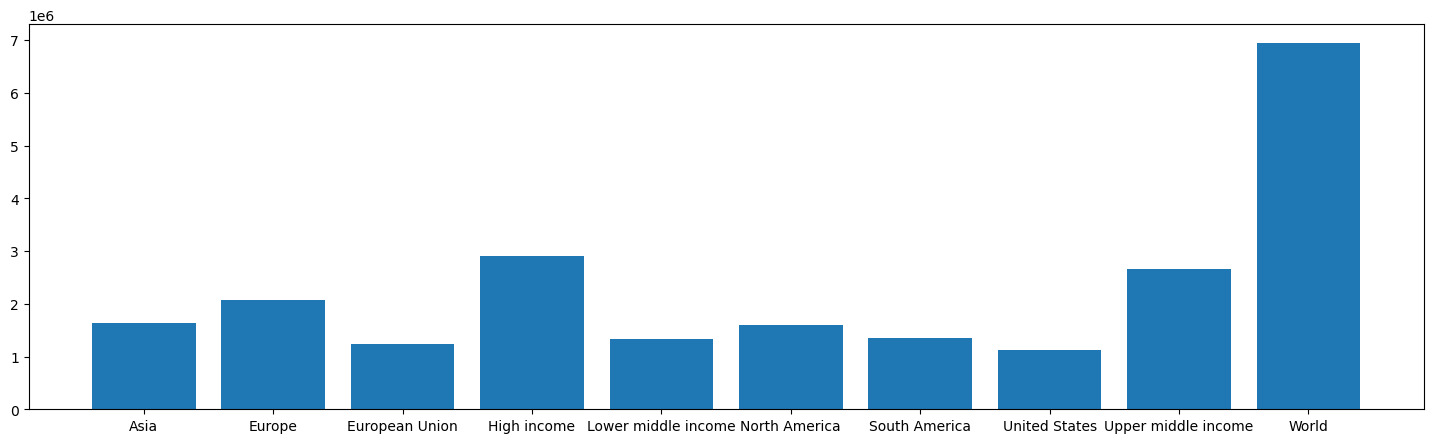

In [247]:
# plot shows the location where the total deaths are greater than 1M

plt.figure(figsize=(18,5))
plt.bar(total_deaths_greater_than_1M['location'],total_deaths_greater_than_1M['total_deaths'],width=0.8)
plt.show()

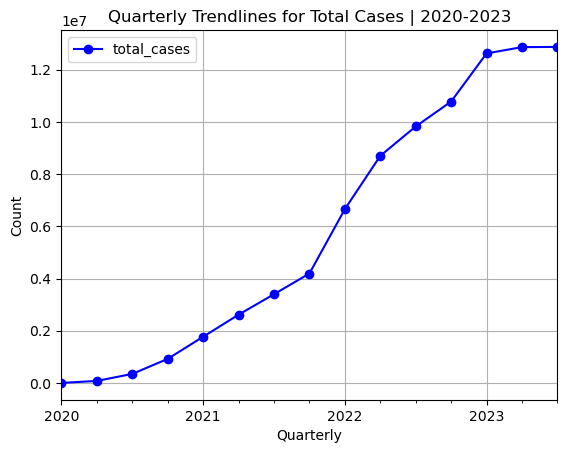

In [327]:
totalcases_df = df[['date', 'total_cases']]

quarterly_totalcases = totalcases_df.resample('q', on='date').mean()

# Plot the count of total COVID-19 cases
quarterly_totalcases.plot(kind='line', marker='o', label='Total Deaths', linestyle='-', color='b')
plt.xlabel('Quarterly')
plt.ylabel('Count')
plt.title('Quarterly Trendlines for Total Cases | 2020-2023')
plt.grid(True)
plt.show()

In [348]:
df[['date','total_cases']].loc[df['total_cases'] == df['total_cases'].max()]

,date,total_cases
323356,2023-07-18,768237024.0
323357,2023-07-19,768237024.0


<Figure size 1000x600 with 0 Axes>

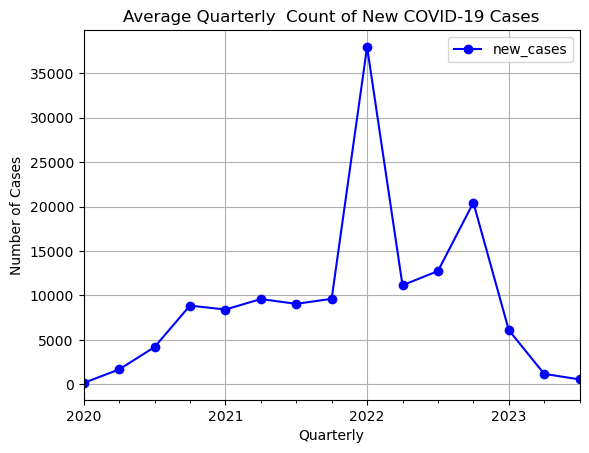

In [328]:
new_cases_df = df[['date', 'new_cases']]

# Resample the data to quarterly frequency
quarterly_new_cases = new_cases_df.resample('q', on='date').mean()

# Plot the count of new COVID-19 cases
plt.figure(figsize=(10, 6))
quarterly_new_cases.plot(kind='line', marker='o', linestyle='-', color='b')
plt.title('Average Quarterly Count of New COVID-19 Cases')
plt.xlabel('Quarterly')
plt.ylabel('Number of Cases')
plt.grid(True)
plt.show()

<Figure size 1000x600 with 0 Axes>

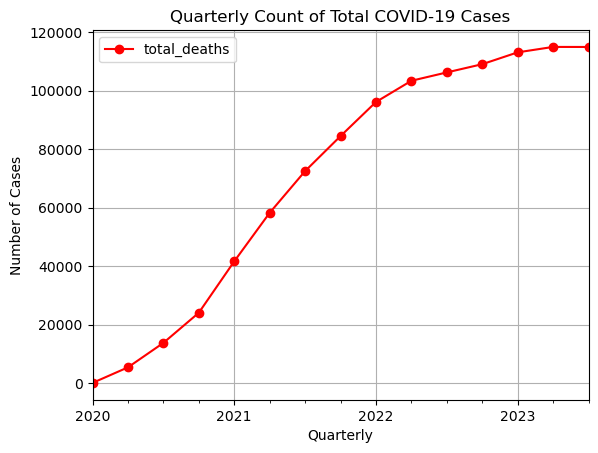

In [330]:
total_deathcases_df = df[['date', 'total_deaths']]

# Resample the data to quarterly frequency
quarterly_total_deathcases = total_deathcases_df.resample('q', on='date').mean()

# Plot the total count of deaths - COVID-19 cases
plt.figure(figsize=(10, 6))
quarterly_total_deathcases.plot(kind='line', marker='o', linestyle='-', color='r')
plt.title('Quarterly Count of Total COVID-19 Cases')
plt.xlabel('Quarterly')
plt.ylabel('Number of Cases')
plt.grid(True)
plt.show()

In [347]:
df[['date','total_deaths']].loc[df['total_deaths'] == df['total_deaths'].max()]

,date,total_deaths
323356,2023-07-18,6951664.0
323357,2023-07-19,6951664.0


<Figure size 1000x600 with 0 Axes>

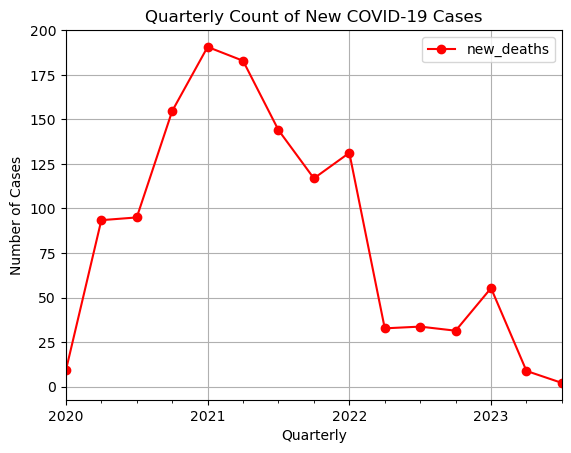

In [331]:
new_deathcases_df = df[['date', 'new_deaths']]

# Resample the data to quarterly frequency
quarterly_new_deathcases = new_deathcases_df.resample('q', on='date').mean()

# Plot the count of new COVID-19 death cases
plt.figure(figsize=(10, 6))
quarterly_new_deathcases.plot(kind='line', marker='o', linestyle='-', color='r')
plt.title('Quarterly Count of New COVID-19 Cases')
plt.xlabel('Quarterly')
plt.ylabel('Number of Cases')
plt.grid(True)
plt.show()

<Figure size 1000x600 with 0 Axes>

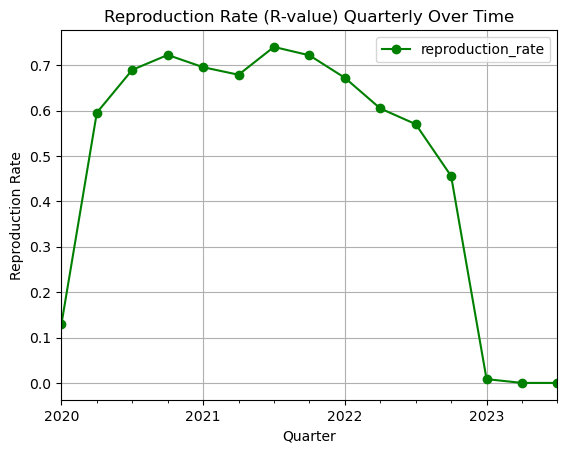

In [287]:
reproduction_df = df[['date', 'reproduction_rate']]

# Resample the data to quarterly frequency
quarterly_reproduction = reproduction_df.resample('Q', on='date').mean()

# Plot the quarterly reproduction rate over time
plt.figure(figsize=(10, 6))
quarterly_reproduction.plot(kind='line', marker='o', linestyle='-', color='g')
plt.title('Reproduction Rate (R-value) Quarterly Over Time')
plt.xlabel('Quarter')
plt.ylabel('Reproduction Rate')
plt.grid(True)
plt.show()

<Figure size 1000x600 with 0 Axes>

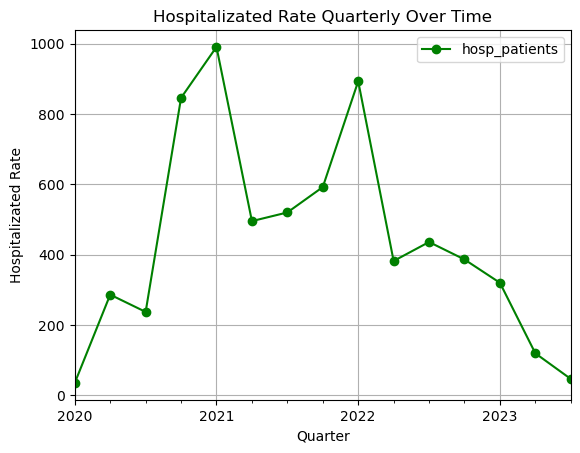

In [288]:
hospitalizated_df = df[['date', 'hosp_patients']]

# Resample the data to quarterly frequency and calculate the mean hospitalized rate for each quarter
quarterly_hospitalizated = hospitalizated_df.resample('Q', on='date').mean()

# Plot the quarterly reproduction rate over time
plt.figure(figsize=(10, 6))
quarterly_hospitalizated.plot(kind='line', marker='o', linestyle='-', color='g')
plt.title('Hospitalizated Rate Quarterly Over Time')
plt.xlabel('Quarter')
plt.ylabel('Hospitalizated Rate')
plt.grid(True)
plt.show()

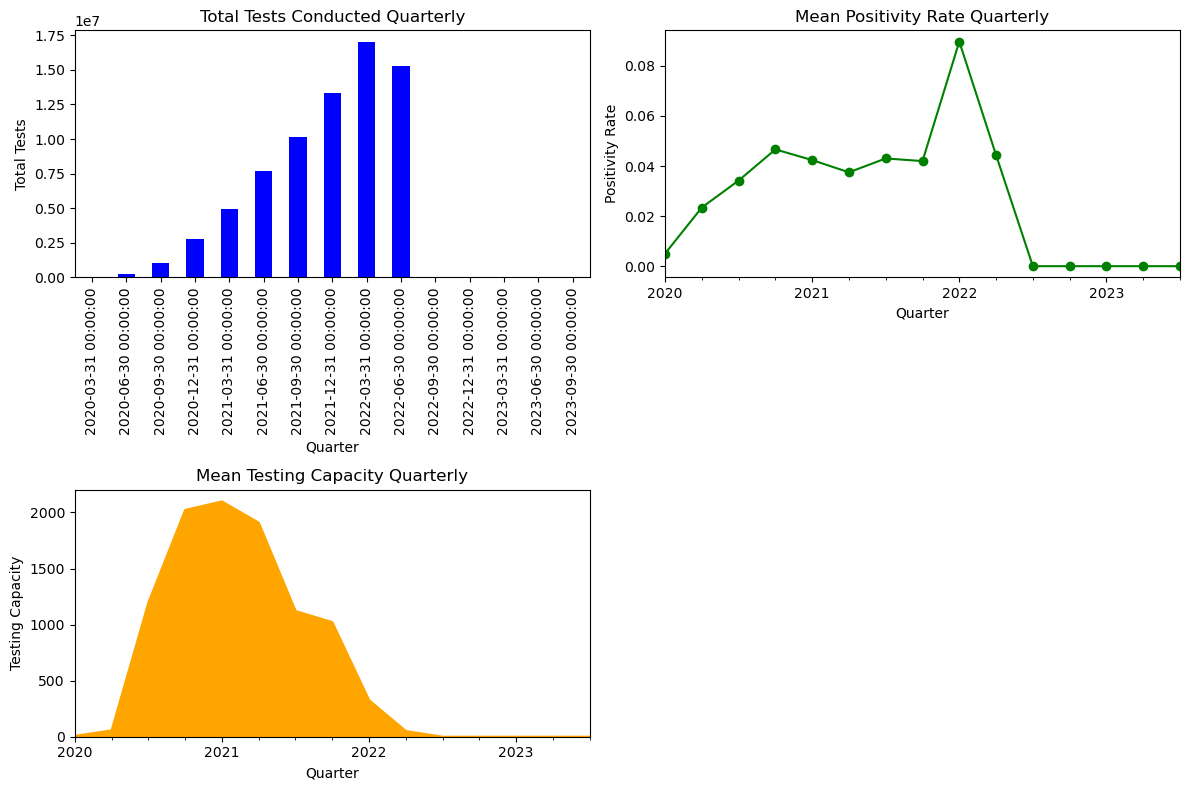

In [337]:
# Filter the DataFrame for the relevant columns
testing_df = df[['date', 'total_tests', 'positive_rate', 'tests_per_case']]

# Resample the data to quarterly frequency and calculate the sum/mean of testing metrics for each quarter
quarterly_testing = testing_df.resample('Q', on='date').agg({'total_tests': 'mean', 'positive_rate': 'mean', 'tests_per_case': 'mean'})

# Plot the quarterly testing metrics over time
plt.figure(figsize=(12, 8))

# Total tests conducted
plt.subplot(2, 2, 1)
quarterly_testing['total_tests'].plot(kind='bar', color='blue')
plt.title('Total Tests Conducted Quarterly')
plt.xlabel('Quarter')
plt.ylabel('Total Tests')

# Positivity rate
plt.subplot(2, 2, 2)
quarterly_testing['positive_rate'].plot(kind='line', marker='o', color='green')
plt.title('Mean Positivity Rate Quarterly')
plt.xlabel('Quarter')
plt.ylabel('Positivity Rate')

# Testing capacity
plt.subplot(2, 2, 3)
quarterly_testing['tests_per_case'].plot(kind='area', color='orange')
plt.title('Mean Testing Capacity Quarterly')
plt.xlabel('Quarter')
plt.ylabel('Testing Capacity')

plt.tight_layout()
plt.show()

C:\Users\Zain Gadagkar\AppData\Local\Temp\ipykernel_3652\272152665.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vaccination_df['percentage_vaccinated'] = (vaccination_df['people_vaccinated'] / vaccination_df['population']) * 100
C:\Users\Zain Gadagkar\AppData\Local\Temp\ipykernel_3652\272152665.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vaccination_df['vaccination_rate'] = vaccination_df['total_vaccinations'].diff().abs()  # Take absolute difference


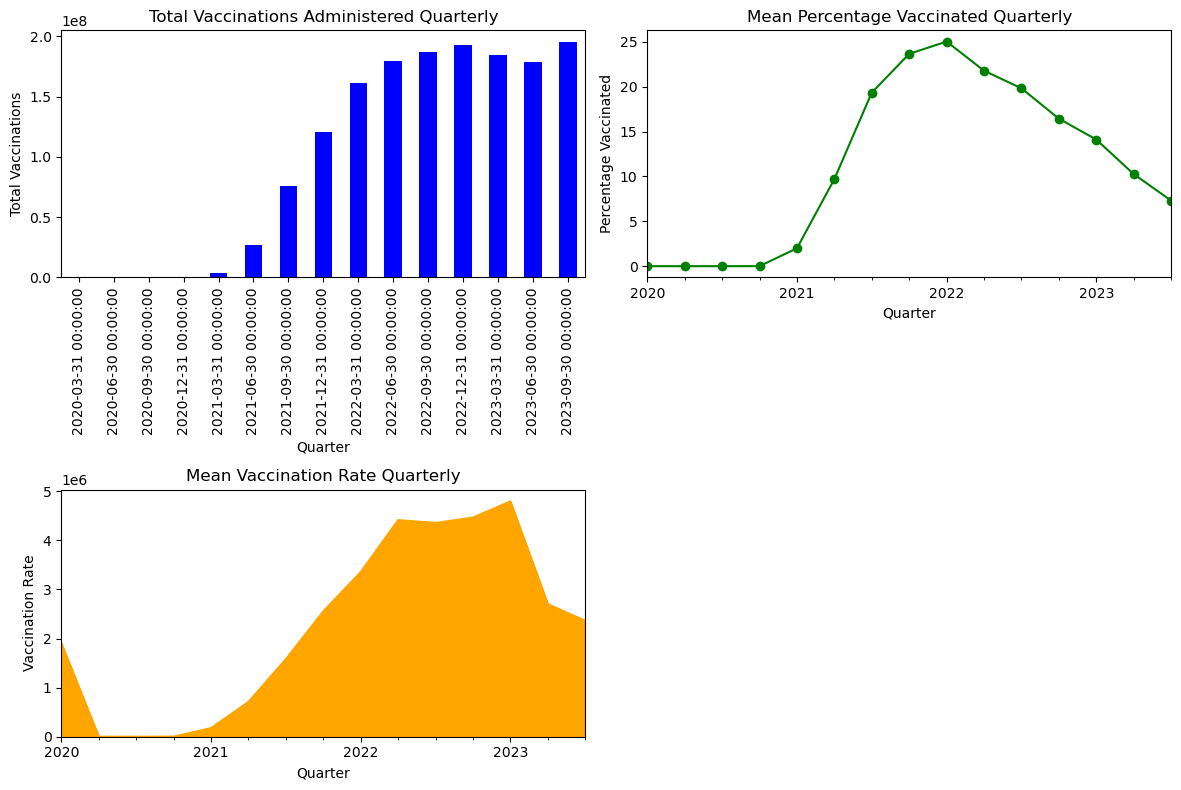

In [336]:
# Filter the DataFrame for the relevant columns
vaccination_df = df[['date', 'total_vaccinations', 'people_vaccinated', 'population']]

# Calculate additional metrics
vaccination_df['percentage_vaccinated'] = (vaccination_df['people_vaccinated'] / vaccination_df['population']) * 100
vaccination_df['vaccination_rate'] = vaccination_df['total_vaccinations'].diff().abs()  # Take absolute difference

# Resample the data to quarterly frequency and calculate the sum of total vaccinations, mean percentage vaccinated, and mean vaccination rate for each quarter
quarterly_vaccination = vaccination_df.resample('Q', on='date').agg({'total_vaccinations': 'mean', 'percentage_vaccinated': 'mean', 'vaccination_rate': 'mean'})

# Plot the quarterly vaccination metrics over time
plt.figure(figsize=(12, 8))

# Total vaccinations administered
plt.subplot(2, 2, 1)
quarterly_vaccination['total_vaccinations'].plot(kind='bar', color='blue')
plt.title('Total Vaccinations Administered Quarterly')
plt.xlabel('Quarter')
plt.ylabel('Total Vaccinations')

# Percentage of population vaccinated
plt.subplot(2, 2, 2)
quarterly_vaccination['percentage_vaccinated'].plot(kind='line', marker='o', color='green')
plt.title('Mean Percentage Vaccinated Quarterly')
plt.xlabel('Quarter')
plt.ylabel('Percentage Vaccinated')

# Vaccination rate
plt.subplot(2, 2, 3)
quarterly_vaccination['vaccination_rate'].plot(kind='area', color='orange')
plt.title('Mean Vaccination Rate Quarterly')
plt.xlabel('Quarter')
plt.ylabel('Vaccination Rate')

plt.tight_layout()
plt.show()

### The analysis of COVID-19 data reveals that the pandemic reached its peak between 2020 and 2022, with a significant increase in cases and deaths. However, effective control measures, including increased testing and vaccination efforts, led to a decline in transmission rates. The findings underscore the importance of data-driven approaches in managing public health crises and highlight the effectiveness of vaccination campaigns in containing the spread of infectious diseases.